# Final Project - EDA and Utilities
![Olympic Rings](https://idrottsforum.org/wp-content/uploads/2019/02/winter-olympics.jpg)

First, let's install some dependencies, if not already installed.

In [272]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

## Dataset EDA
### Read the dataset
Let's read the dataset and have a look at the first few features.

In [273]:
athletes = pd.read_csv('https://raw.githubusercontent.com/martinuray/aaip-plus/main/assets/course_material/datasets/athlete_events.csv')
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Quiz Questions

These are some questions, that may give you an intuition on how to explore the dataset. This is not something that is going to be assesed and is just for you! This will not be checked!

In the next section you will find some test, where you can test your results against (but you don't have to). For this, store the result into the stated variables.

1. How many athlete/event combinations are in the dataset (number of rows)? Store the number to the `num_aec` variable.

In [274]:
num_aec = athletes.shape[0]
print(f'Number of unique athletes: {num_aec}')

Number of unique athletes: 271116


2. How many countries are in the dataset? Store the number to the `num_noc` variable.

In [275]:
num_noc = len(athletes['NOC'].unique())
print(f'Number of unique NOCs: {num_noc}')

Number of unique NOCs: 230


3. How many different events are in the dataset? Store the number to the `num_events` variable.

In [276]:
num_events = len(athletes['Event'].unique())
print(f'Number of unique events: {num_events}')

Number of unique events: 765


4. How many different sport types are in the dataset? Store the number to the `num_sports` variable.

In [277]:
num_sports = len(athletes['Sport'].unique())
print(f'Number of unique sports: {num_sports}')

Number of unique sports: 66


5. How many female athletes are in the dataset? Store the number to the `num_female_athletes` variable.

In [278]:
num_female_athletes = athletes[athletes['Sex'] == 'F']['ID'].nunique()

print(f"Number of unique female athletes: {num_female_athletes}")

Number of unique female athletes: 33981


6. How many hosting cities are in the dataset? Store the number to the `num_hosts` variable.

In [279]:
num_hosts = len(athletes['City'].unique())
print(f'Number of unique hosts: {num_hosts}')

Number of unique hosts: 42


7. How many individual athletes are in the dataset? Store the number to the `num_athletes` variable.

In [280]:
num_athlets = len(athletes['ID'].unique())
print(f'Number of unique athletes: {num_athlets}')

Number of unique athletes: 135571


8. How many male athletes are in the dataset? Store the number to the `num_male_athletes` variable.

In [281]:
num_male_athletes = athletes[athletes['Sex'] == 'M']['ID'].nunique()
print(f'Number of male athletes : {num_male_athletes}')

Number of male athletes : 101590


9. How many unique medalists are in the dataset? Store the number to the `num_unique_medalists` variable.

In [282]:
medalist = athletes[athletes['Medal'].notnull()]
num_unique_medalists = len(medalist['ID'].unique())
print(f'Number of unique medalists: {num_unique_medalists}')


Number of unique medalists: 28251


10. Where did the first modern Olympic Games take place? Store the city name to the `first_olympic_host` variable.

In [283]:
first_year = athletes['Year'].min()
first_olympic_host = athletes[athletes['Year'] == first_year]['City'].unique()[0]
print(f'First year of the Olympics: {first_year}')
print(f'First Olympic host: {first_olympic_host}')

First year of the Olympics: 1896
First Olympic host: Athina


11. Who is the athlete to compete in the most events? Store the name to the `most_freq_athlete` variable.

In [284]:
most_freq_athlete = athletes['Name'].value_counts().idxmax()
print(f'Most frequent athlete: {most_freq_athlete}')

Most frequent athlete: Robert Tait McKenzie


12. Who is the most successful athlete (most medasl won)? Store the name to the `most_medal_athlete` variable.

In [285]:
most_medal_athlete = athletes[athletes['Medal'].notnull()]['Name'].value_counts().idxmax()
print(f'Most medal athlete: {most_medal_athlete}')

Most medal athlete: Michael Fred Phelps, II


### Quiz - Check Results
If you have everything correct, this runs without any errors.

In [286]:
assert num_aec == 271116
assert num_noc == 230
assert num_events == 765
assert num_sports == 66
assert num_female_athletes == 33981
assert num_hosts == 42
assert num_athlets == 135571
assert num_male_athletes == 101590
assert num_unique_medalists == 28251
assert first_olympic_host == "Athina"
assert most_freq_athlete == "Robert Tait McKenzie"
assert most_medal_athlete == "Michael Fred Phelps, II"

## Maps - Primer
This is not mandatory. There will be a lab on maps anyway.


### "Reverse-locate" latitude and longitude

We are using GeoPandas to display maps. See [these instructions](https://geopandas.org/install.html) on how to install GeoPandas.

In [287]:
import geopandas as gpd
from  geopy.geocoders import Nominatim

In [288]:
geolocator = Nominatim(user_agent='TestForOlympic', timeout=100)  # set agent name according to your project

host_cities = pd.DataFrame(
    {
        'City': athletes['City'].unique(),
        'latitude': np.nan,
        'longitude': np.nan
    }
)

for idx, c in host_cities.iterrows():
    loc = geolocator.geocode(c['City'], timeout=100)  # time out to prevent being denied access
    host_cities.at[idx, 'latitude'] = loc.latitude
    host_cities.at[idx, 'longitude'] = loc.longitude

Adding the captured latitudinal and longitudinal data to the data frame.

In [289]:
host_cities.head()

,City,latitude,longitude
0,Barcelona,41.382894,2.177432
1,London,51.507446,-0.127765
2,Antwerpen,51.221110,4.399708
3,Paris,48.853495,2.348391
4,Calgary,51.045606,-114.057541


### Define geometry points
Let's do that by means of a GeoDataFrame. Here we use the input from the DataFrame fille previously.

In [290]:
host_cities = gpd.GeoDataFrame(host_cities, geometry=gpd.points_from_xy(host_cities.longitude, host_cities.latitude))
host_cities.head()

,City,latitude,longitude,geometry
0,Barcelona,41.382894,2.177432,POINT (2.17743 41.38289)
1,London,51.507446,-0.127765,POINT (-0.12777 51.50745)
2,Antwerpen,51.221110,4.399708,POINT (4.39971 51.22111)
3,Paris,48.853495,2.348391,POINT (2.34839 48.8535)
4,Calgary,51.045606,-114.057541,POINT (-114.05754 51.04561)


### Draw and save map
With this piece of code you can create your own map. For more on maps, stay tuned to the lab on maps.

Loading the shapefile into GeoPandas...


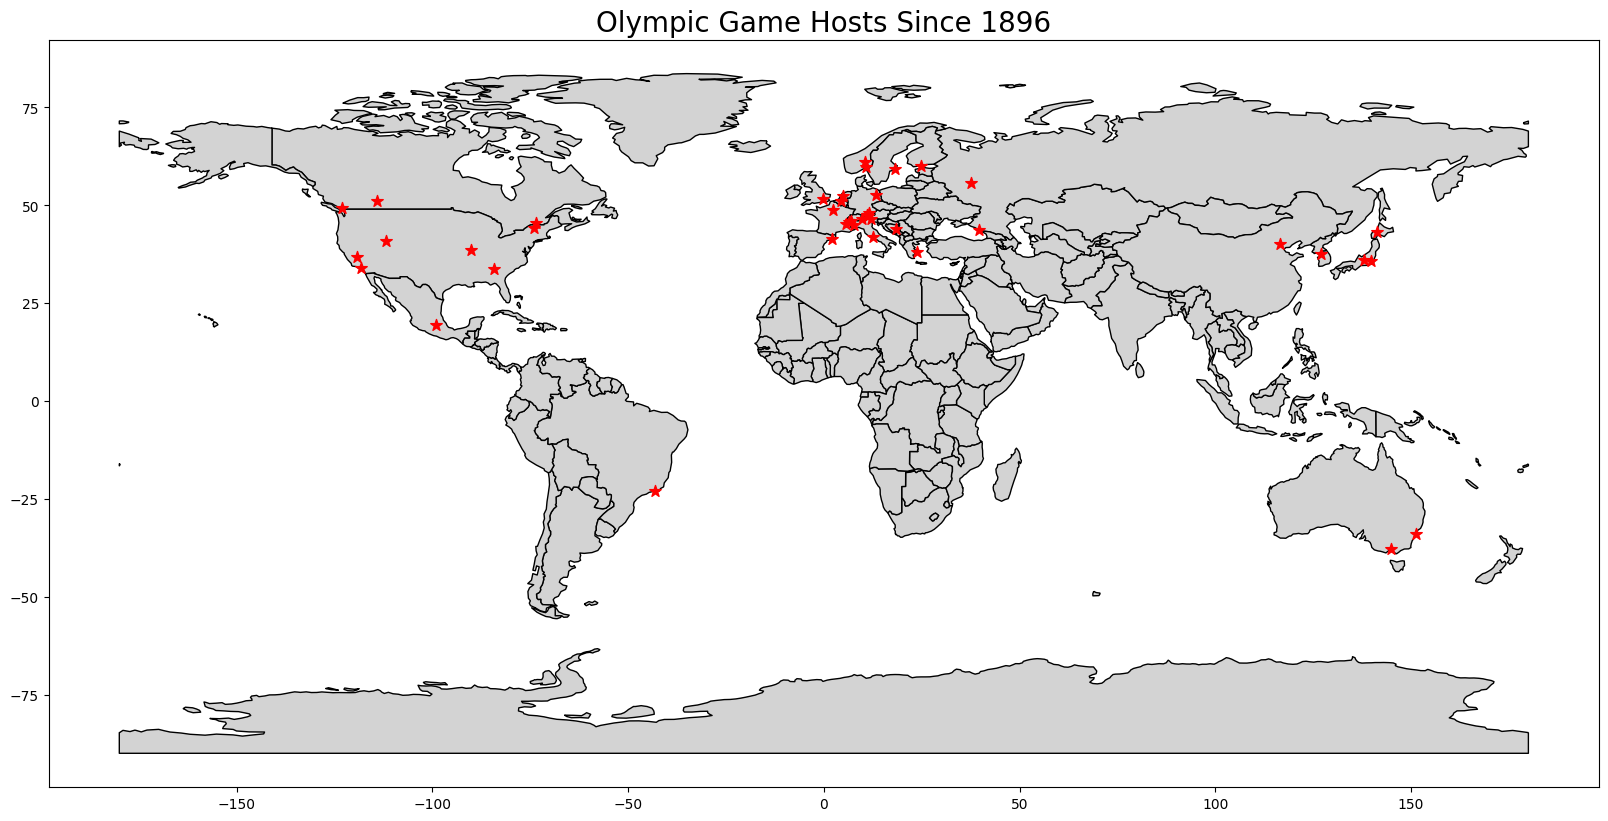

In [291]:
import os
import zipfile
import requests

# download the dataset
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'

# Directory where the shapefile will be downloaded and extracted
download_dir = 'natural_earth'
shapefile_path = os.path.join(download_dir, 'ne_110m_admin_0_countries.shp')


if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# download the set if it is not already downloaded
zip_path = os.path.join(download_dir, 'ne_110m_admin_0_countries.zip')
if not os.path.exists(zip_path):
    print("Downloading Natural Earth shapefile...")
    response = requests.get(url)

    # check if the request was successful
    if response.status_code == 200:
        with open(zip_path, 'wb') as f:
            f.write(response.content)
        print("Download complete!")
    else:
        print(f"Failed to download. Status code: {response.status_code}")

# extract
if zip_path.endswith('.zip') and not os.path.exists(shapefile_path):
    try:
        print("Extracting the dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(download_dir)
        print("Extraction complete!")
    except zipfile.BadZipFile:
        print("Failed to extract: The file is not a valid zip archive or is corrupted.")

# load
print("Loading the shapefile into GeoPandas...")
world = gpd.read_file(shapefile_path)

# Plot the world map
base = world.plot(color='lightgrey', edgecolor='black', figsize=(20,10))
host_cities.plot(ax=base, marker='*', color='red', markersize=75)

# annotation - but it is not useful for this example
#for x, y, label in zip(host_cities.geometry.x, host_cities.geometry.y, host_cities.City):
#    base.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.title('Olympic Game Hosts Since 1896', fontsize=20)
#plt.savefig('olympic_hosts.png', dpi=100)  # increase dpi for poster version
plt.show()

# Additional data preparation

I found pdf with official scores and statictics of each player from Olympics in Beijing 2008, London 2012 and Rio 2016. With help of CHATGPT we retrived all the information from this pdf and created csv_files with them. They will be helpfull to checking how physical statistics, can affect the chances of getting a medal on Olympics

In [292]:
# functions to help with merging the data

def create_data_frame(csv_file: str) -> pd.DataFrame:
    df = pd.read_csv(csv_file)
    return df

def concat_two_data_frames(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    merged = pd.concat([df1, df2], axis=0)
    return merged

def get_list_of_files_from_folder_path(folder_path: str) -> list:
    files = os.listdir(folder_path)
    return [os.path.join(folder_path, file) for file in files]

def create_data_frame_from_files(folder_path: str) -> pd.DataFrame:
    files = get_list_of_files_from_folder_path(folder_path)

    first_df = create_data_frame(files[0])
    for file in files[1:]:
        df = create_data_frame(file)
        first_df = concat_two_data_frames(first_df, df)

    return first_df

### Getting dataframes

In [305]:
# pathes to the data
BEIJING_PATH = 'beijing'
LONDON_PATH = 'london'
RIO_PATH = 'rio'

# create data frames
beijing = create_data_frame_from_files(BEIJING_PATH)
london = create_data_frame_from_files(LONDON_PATH)
rio = create_data_frame_from_files(RIO_PATH)

In [294]:
beijing.head(200)

,Nr,Name/First Name,Nickname,Birthdate,H,W,S,B,OG,WC,OTH,Total,Club,Sex,Country
0,1,Mélinda Raissa Hennaoui,Hennaoui,18/03/1990,178,68,290,278.0,5.0,5.0,NaN,NaN,Istres Volleyball,F,Algeria
1,2,Sehryne Hennaoui,Hennaoui,10/01/1988,172,69,285,273.0,15.0,15.0,NaN,NaN,Istres Volleyball,F,Algeria
2,3,Salima Hammouche,Hammouche,17/01/1984,165,58,270,265.0,15.0,15.0,NaN,NaN,Nc Bejaia,F,Algeria
3,4,Nassima Saliha Benhamouda Ep Akouche,Benhamouda,20/10/1973,180,67,299,287.0,3.0,85.0,88.0,NaN,Mc Alger,F,Algeria
4,5,Mouni Amrane,Amrane,19/05/1991,183,60,300,290.0,10.0,10.0,NaN,NaN,Montreal Volleyball,F,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,Aguero Taismary,Aguero,05/03/1977,177,74,306,285.0,8.0,105.0,NaN,113.0,Tur Telekom,F,Italy
16,17,Gioli Simona,Gioli,17/09/1977,185,70,308,285.0,8.0,105.0,NaN,113.0,Despar Sirio Perugia,F,Italy
17,18,Pincerato Giulia,Pincerato,16/03/1987,182,68,294,279.0,1.0,NaN,NaN,1.0,Unicom Starker Sassuolo,F,Italy
0,1,Saito Nobuharu,Saito,29/09/1973,205,95,345,330.0,11.0,139.0,150.0,NaN,Toray Arrows,M,Japan


In [306]:
london.head(200)

,No,Name,Shirt Name,Height m / ft in,Weight kg / lbs,Highest Reach Spike cm,Block cm,Date of Birth,Club,WCH,...,Int,Tot,Country,Sex,C/L,National Selections WCH,National Selections OG,National Selections Int,National Selections Tot,Highest Reach Block cm
0,1,HENNAOUI Sehryne,HENNAOUI S.,"1.72/5'8""",69/152,285,273.0,10 JAN 1988,"Hainaut Volleyball, Valenciennes (FRA)",0.0,...,15.0,20.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ACHOUR Dallal Merwa,ACHOUR,"1.75/5'9""",60/132,279,273.0,03 NOV 1994,"ESF Mouzaia, Blida (ALG)",0.0,...,12.0,12.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
2,3,HAMMOUCHE Salima,SALIMA,"1.58/5'2""",54/119,270,265.0,17 JAN 1984,"G.S. Petroliers, Alger (ALG)",5.0,...,10.0,15.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
3,5,KHAMTACHE Amel,KHAMTACHE,"1.81/5'11""",65/143,303,235.0,04 MAY 1990,"G.S. Petroliers, Alger (ALG)",0.0,...,5.0,5.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
4,8,BENSALEM Zohra,BENSALEM,"1.78/5'10""",68/150,310,299.0,05 APR 1994,"G.S. Petroliers, Alger (ALG)",5.0,...,50.0,55.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,18,MIKHAYLOV Maxim,Mikhaylov,"2.10/6'11""",95,345,NaN,19 FEB 1988,"Zenit Kazan, Kazan (RUS)",17.0,...,158.0,158.0,Russia,Men,NaN,NaN,NaN,NaN,NaN,341.0
10,20,OBMOCHAEV Alexey,Obmochaev,"1.88/6'2""",85,325,NaN,22 MAY 1989,"Zenit Kazan, Kazan (RUS)",0.0,...,3.0,3.0,Russia,Men,L,NaN,NaN,NaN,NaN,310.0
0,1,BORISENKO Maria,Borodakova,"1.90/6'3""",80/176,301,297.0,08 MAR 1986,"Dinamo-Kazan, Kazan (RUS)",20.0,...,53.0,79.0,Russia,F,NaN,NaN,NaN,NaN,NaN,NaN
1,3,PEREPELKINA Maria,Perepelkina,"1.87/6'2""",72/159,304,300.0,09 MAR 1984,"Dinamo Moscow, Moscow (RUS)",11.0,...,17.0,28.0,Russia,F,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
rio.head(200)

,No.,Name / First Name,Nickname,Birthdate,H,W,S,B,WCH,OG,OTH,Tot.,Club,Country,Sex
0,1,Bruno Nicolas,Bruno,24.02.89,187.0,85.0,338.0,318.0,6.0,4.0,43.0,49.0,Personal Bolivar,Argentina,M
1,2,Flores Fabian,Flores,25.05.91,194.0,85.0,335.0,315.0,6.0,4.0,40.0,46.0,Club Ciudad de Campana,Argentina,M
2,3,Martinez Franchi Jan,Martinez,28.01.98,197.0,85.0,338.0,318.0,6.0,4.0,40.0,46.0,Club Ciudad de Buenos Aires,Argentina,M
3,4,Ramos Martin,Ramos,30.03.94,199.0,90.0,350.0,340.0,6.0,4.0,42.0,48.0,UPC San Juan,Argentina,M
4,5,Uriarte Nicolas,Uriarte,21.03.90,192.0,84.0,340.0,330.0,9.0,4.0,45.0,58.0,PGE Skra Belchatow,Argentina,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2,Nelli Gabriele,Nelli,04.12.93,210.0,95.0,335.0,320.0,7.0,7.0,70.0,84.0,Trentino Volley,Italy,M
2,3,Sottile Pasquale,Sottile,19.09.79,190.0,80.0,325.0,310.0,8.0,10.0,90.0,108.0,Top Volley,Italy,M
3,4,Vettori Luca,Vettori,26.04.91,202.0,103.0,335.0,333.0,13.0,12.0,85.0,110.0,Modena Volley Punto Zero,Italy,M
4,5,Juantorena Osmany,Juantorena,12.08.85,195.0,90.0,355.0,340.0,13.0,15.0,135.0,163.0,Dynamo Moscow,Italy,M


### Cleaning dataframes

I need to clean the dataframes so they will contain the same informations in the same format. Statistics I will need :

    - birthdate [to calculate the age at the time of olympics]
    - height (in cm)
    - weight (in kg)
    - spike reach (in cm)
    - block reach (in cm)
    - club ()
    - sex
    - country

In [307]:
# getting columns names from each data frame
beijing_columns = beijing.columns
london_columns = london.columns
rio_columns = rio.columns

beijing_columns, london_columns, rio_columns

(Index(['Nr', 'Name/First Name', 'Nickname', 'Birthdate', 'H', 'W', 'S', 'B',
        'OG', 'WC', 'OTH', 'Total', 'Club', 'Sex', 'Country'],
       dtype='object'),
 Index(['No', 'Name', 'Shirt Name', 'Height m / ft in', 'Weight kg / lbs',
        'Highest Reach Spike cm', 'Block cm', 'Date of Birth', 'Club', 'WCH',
        'OG', 'Int', 'Tot', 'Country', 'Sex', 'C/L', 'National Selections WCH',
        'National Selections OG', 'National Selections Int',
        'National Selections Tot', 'Highest Reach Block cm'],
       dtype='object'),
 Index(['No.', 'Name / First Name', 'Nickname', 'Birthdate', 'H', 'W', 'S', 'B',
        'WCH', 'OG', 'OTH', 'Tot.', 'Club', 'Country', 'Sex'],
       dtype='object'))

In [308]:
# making a subset of columns
beijing_subset = ['Name/First Name', 'Birthdate', 'H', 'W', 'S', 'B', 'Sex', 'Country', 'Club']
london_subset = ['Name', 'Height m / ft in', 'Weight kg / lbs', 'Highest Reach Spike cm', 'Block cm', 'Date of Birth', 'Club', 'Country', 'Sex']
rio_subset = ['Name / First Name', 'Birthdate', 'H', 'W', 'S', 'B', 'Club', 'Country', 'Sex']

# getting the dataframes
beijing_df = beijing[beijing_subset]
london_df = london[london_subset]
rio_df = rio[rio_subset]

In [299]:
beijing_df.head()

,Name/First Name,Birthdate,H,W,S,B,Sex,Country,Club
0,Mélinda Raissa Hennaoui,18/03/1990,178,68,290,278.0,F,Algeria,Istres Volleyball
1,Sehryne Hennaoui,10/01/1988,172,69,285,273.0,F,Algeria,Istres Volleyball
2,Salima Hammouche,17/01/1984,165,58,270,265.0,F,Algeria,Nc Bejaia
3,Nassima Saliha Benhamouda Ep Akouche,20/10/1973,180,67,299,287.0,F,Algeria,Mc Alger
4,Mouni Amrane,19/05/1991,183,60,300,290.0,F,Algeria,Montreal Volleyball


In [310]:
london.head()

,No,Name,Shirt Name,Height m / ft in,Weight kg / lbs,Highest Reach Spike cm,Block cm,Date of Birth,Club,WCH,...,Int,Tot,Country,Sex,C/L,National Selections WCH,National Selections OG,National Selections Int,National Selections Tot,Highest Reach Block cm
0,1,HENNAOUI Sehryne,HENNAOUI S.,"1.72/5'8""",69/152,285,273.0,10 JAN 1988,"Hainaut Volleyball, Valenciennes (FRA)",0.0,...,15.0,20.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ACHOUR Dallal Merwa,ACHOUR,"1.75/5'9""",60/132,279,273.0,03 NOV 1994,"ESF Mouzaia, Blida (ALG)",0.0,...,12.0,12.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
2,3,HAMMOUCHE Salima,SALIMA,"1.58/5'2""",54/119,270,265.0,17 JAN 1984,"G.S. Petroliers, Alger (ALG)",5.0,...,10.0,15.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
3,5,KHAMTACHE Amel,KHAMTACHE,"1.81/5'11""",65/143,303,235.0,04 MAY 1990,"G.S. Petroliers, Alger (ALG)",0.0,...,5.0,5.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN
4,8,BENSALEM Zohra,BENSALEM,"1.78/5'10""",68/150,310,299.0,05 APR 1994,"G.S. Petroliers, Alger (ALG)",5.0,...,50.0,55.0,Algeria,F,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
rio_df.head()

,Name / First Name,Birthdate,H,W,S,B,Club,Country,Sex
0,Bruno Nicolas,24.02.89,187.0,85.0,338.0,318.0,Personal Bolivar,Argentina,M
1,Flores Fabian,25.05.91,194.0,85.0,335.0,315.0,Club Ciudad de Campana,Argentina,M
2,Martinez Franchi Jan,28.01.98,197.0,85.0,338.0,318.0,Club Ciudad de Buenos Aires,Argentina,M
3,Ramos Martin,30.03.94,199.0,90.0,350.0,340.0,UPC San Juan,Argentina,M
4,Uriarte Nicolas,21.03.90,192.0,84.0,340.0,330.0,PGE Skra Belchatow,Argentina,M


Although we have the same information in each data frame, it is stored differently. So now I have to perform the following steps: 

    1.Name all the columns in the same way
    2.Add a column with Year of Olympics
    3. Change all the data to have the same format (date, weight, height, spike, block)
    4. Change all the names to fomrat : <Last_name First_name>

In [312]:
# changing the column names
BEIJING_NEW_COLUMNS = ['Name', 'Birthdate', 'Height', 'Weight', 'Spike', 'Block', 'Sex', 'Country', 'Club']
LONDON_NEW_COLUMNS = ['Name', 'Height', 'Weight', 'Spike', 'Block', 'Birthdate', 'Club', 'Country','Sex']
RIO_NEW_COLUMNS = ['Name', 'Birthdate', 'Height', 'Weight', 'Spike', 'Block', 'Club', 'Country', 'Sex']


beijing_df.columns = BEIJING_NEW_COLUMNS
london_df.columns = LONDON_NEW_COLUMNS
rio_df.columns = RIO_NEW_COLUMNS

beijing_df.columns, london_df.columns, rio_df.columns

(Index(['Name', 'Birthdate', 'Height', 'Weight', 'Spike', 'Block', 'Sex',
        'Country', 'Club'],
       dtype='object'),
 Index(['Name', 'Height', 'Weight', 'Spike', 'Block', 'Birthdate', 'Club',
        'Country', 'Sex'],
       dtype='object'),
 Index(['Name', 'Birthdate', 'Height', 'Weight', 'Spike', 'Block', 'Club',
        'Country', 'Sex'],
       dtype='object'))

In [313]:
# cahnge the date format
beijing_df['Birthdate'] = pd.to_datetime(beijing_df['Birthdate'], format='mixed')
rio_df['Birthdate'] = pd.to_datetime(rio_df['Birthdate'], format='mixed')
london_df['Birthdate'] = pd.to_datetime(london_df['Birthdate'], format='mixed')

C:\Users\barte\AppData\Local\Temp\ipykernel_6884\4076046755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df['Birthdate'] = pd.to_datetime(beijing_df['Birthdate'], format='mixed')
C:\Users\barte\AppData\Local\Temp\ipykernel_6884\4076046755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rio_df['Birthdate'] = pd.to_datetime(rio_df['Birthdate'], format='mixed')
C:\Users\barte\AppData\Local\Temp\ipykernel_6884\4076046755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [315]:
beijing_df['Birthdate'].head(1), rio_df['Birthdate'].head(1), london_df['Birthdate'].head(1)

(0   1990-03-18
 Name: Birthdate, dtype: datetime64[ns],
 0   1989-02-24
 Name: Birthdate, dtype: datetime64[ns],
 0   1988-01-10
 Name: Birthdate, dtype: datetime64[ns])

# Volleyball data preparation

### Getting a subset with only volleyball players

In [ ]:
volleyball_athletes = athletes[athletes['Sport'] == 'Volleyball']
volleyball_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
291,156,Mahmoud Abd El-Kader,M,23.0,195.0,94.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN
299,161,Hossam Abdalla,M,28.0,203.0,97.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
318,171,Mahmoud Abdel Aziz,M,25.0,174.0,70.0,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Men's Volleyball,NaN
342,188,Mohamed Abdel Hamed,M,24.0,193.0,82.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Volleyball,Volleyball Men's Volleyball,NaN
365,203,Ahmed Abdel Naeim,M,23.0,197.0,87.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN


In [ ]:
volleyball_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3404 entries, 291 to 271091
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3404 non-null   int64  
 1   Name    3404 non-null   object 
 2   Sex     3404 non-null   object 
 3   Age     3395 non-null   float64
 4   Height  3283 non-null   float64
 5   Weight  3277 non-null   float64
 6   Team    3404 non-null   object 
 7   NOC     3404 non-null   object 
 8   Games   3404 non-null   object 
 9   Year    3404 non-null   int64  
 10  Season  3404 non-null   object 
 11  City    3404 non-null   object 
 12  Sport   3404 non-null   object 
 13  Event   3404 non-null   object 
 14  Medal   969 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 425.5+ KB


I have information about 3404 playes, which should be enough to make an analysis on different aspects of volleyball at the Olympics Games

### Countries and players

In [ ]:
unique_countries = volleyball_athletes['NOC'].nunique()
print(f'Number of unique countries: {unique_countries}')


Number of unique countries: 48


In [ ]:
players_in_countries = volleyball_athletes['NOC'].value_counts()
players_in_countries.head()

NOC
BRA    285
USA    263
JPN    232
KOR    215
ITA    192
Name: count, dtype: int64

In [ ]:
unique_players = volleyball_athletes['ID'].nunique()
print(f'Number of unique players: {unique_players}')

Number of unique players: 2503


In [ ]:
plyers = volleyball_athletes.groupby('Sex')['Name'].value_counts()
plyers.head()

Sex  Name                                        
F    Yevgeniya Viktorovna Artamonova-Estes           6
     Danielle Raquel Scott-Arruda                    5
     Eleonora Lo Bianco                              5
     Hlia "Fofo" Rogrio de Souza Pinto               5
     Lyubov Vladimirovna Sokolova-Shashkova (-Kl)    5
Name: count, dtype: int64

In [ ]:
woman_volleyall_players = volleyball_athletes[volleyball_athletes['Sex']=='F']
woman_volleyall_players.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
447,249,Mouni Abderrahim,F,22.0,173.0,60.0,Algeria,ALG,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Women's Volleyball,NaN
448,249,Mouni Abderrahim,F,26.0,173.0,60.0,Algeria,ALG,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,NaN
489,269,Fawziya Abdoulkarim,F,27.0,180.0,67.0,Cameroon,CMR,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,NaN
799,457,Thorine Christelle Aboa Mbeza,F,23.0,182.0,78.0,Cameroon,CMR,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Women's Volleyball,NaN
971,547,Nelli Mikhaylovna Abramova,F,24.0,171.0,60.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Volleyball,Volleyball Women's Volleyball,Silver


In [ ]:
man_volleyall_players = volleyball_athletes[volleyball_athletes['Sex']=='M']
man_volleyall_players.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
291,156,Mahmoud Abd El-Kader,M,23.0,195.0,94.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN
299,161,Hossam Abdalla,M,28.0,203.0,97.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NaN
318,171,Mahmoud Abdel Aziz,M,25.0,174.0,70.0,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Men's Volleyball,NaN
342,188,Mohamed Abdel Hamed,M,24.0,193.0,82.0,Egypt,EGY,1984 Summer,1984,Summer,Los Angeles,Volleyball,Volleyball Men's Volleyball,NaN
365,203,Ahmed Abdel Naeim,M,23.0,197.0,87.0,Egypt,EGY,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Men's Volleyball,NaN


In [ ]:
woman_volleyall_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543 entries, 447 to 270111
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1543 non-null   int64  
 1   Name    1543 non-null   object 
 2   Sex     1543 non-null   object 
 3   Age     1543 non-null   float64
 4   Height  1495 non-null   float64
 5   Weight  1495 non-null   float64
 6   Team    1543 non-null   object 
 7   NOC     1543 non-null   object 
 8   Games   1543 non-null   object 
 9   Year    1543 non-null   int64  
 10  Season  1543 non-null   object 
 11  City    1543 non-null   object 
 12  Sport   1543 non-null   object 
 13  Event   1543 non-null   object 
 14  Medal   474 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 192.9+ KB


In [ ]:
man_volleyall_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1861 entries, 291 to 271091
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1861 non-null   int64  
 1   Name    1861 non-null   object 
 2   Sex     1861 non-null   object 
 3   Age     1852 non-null   float64
 4   Height  1788 non-null   float64
 5   Weight  1782 non-null   float64
 6   Team    1861 non-null   object 
 7   NOC     1861 non-null   object 
 8   Games   1861 non-null   object 
 9   Year    1861 non-null   int64  
 10  Season  1861 non-null   object 
 11  City    1861 non-null   object 
 12  Sport   1861 non-null   object 
 13  Event   1861 non-null   object 
 14  Medal   495 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 232.6+ KB
